In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data filebron are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduates-admission-prediction/admission_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/graduates-admission-prediction/admission_data.csv')
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Exploratory Data Analysis**

1. Checking is there any missing data
2. Checking the Statistics
3. Checking the distributions to understand whether a student can get admit or not
4. Checking the realtion of every independent feature vs dependent feature
5. Checking Multicollinearlity


# Checking the Missing Data

In [3]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values in the Dataset


# Checking the Statistics

In [4]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


50 percent of the students have admit chance greater than 72%

# Checking the distributions

<AxesSubplot:title={'center':'Research'}, xlabel='Research', ylabel='count'>

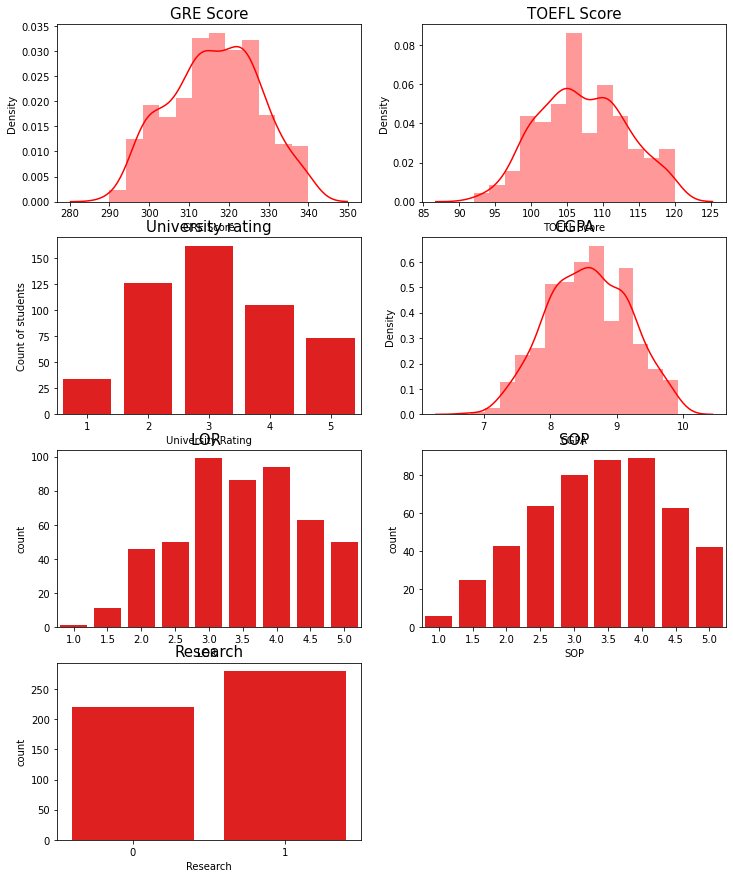

In [5]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,15))
plt.subplot(4,2,1)
plt.title('GRE Score', fontsize=15)
sns.distplot(df['GRE Score'], color='red')

plt.subplot(4,2,2)
plt.title('TOEFL Score', fontsize=15)
sns.distplot(df['TOEFL Score'], color='red')

plt.subplot(4,2,3)
plt.title('University rating', fontsize=15)
sns.countplot(x=df['University Rating'], color='red')
plt.ylabel('Count of students')

plt.subplot(4,2,4)
plt.title('CGPA', fontsize=15)
sns.distplot(df['CGPA'], color='red')

plt.subplot(4,2,5)
plt.title('LOR ', fontsize=15)
sns.countplot(df['LOR '], color='red')

plt.subplot(4,2,6)
plt.title('SOP', fontsize=15)
sns.countplot(df['SOP'], color='red')

plt.subplot(4,2,7)
plt.title('Research', fontsize=15)
sns.countplot(df['Research'], color='red')



# Checking the realtion of every independent feature vs dependent feature

In [6]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Figure size 1080x2160 with 0 Axes>

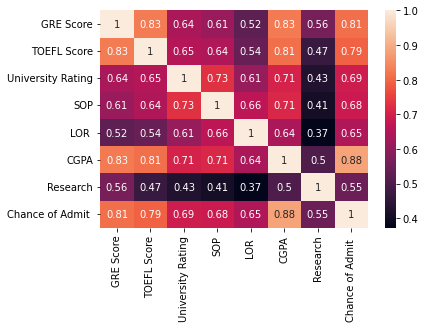

<Figure size 1080x2160 with 0 Axes>

In [7]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(15,30))

# Checking the distributions to understand whether a student can get admit or not

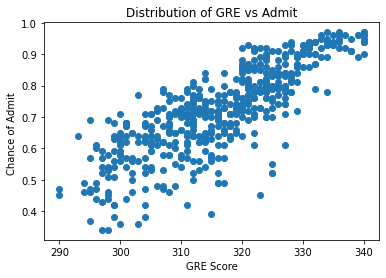

In [8]:
plt.scatter(df['GRE Score'], df['Chance of Admit '])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit ')
plt.title('Distribution of GRE vs Admit')
plt.show()

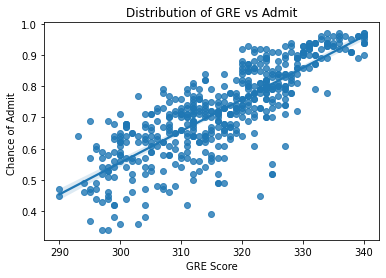

In [9]:
sns.regplot(df['GRE Score'], df['Chance of Admit '])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit ')
plt.title('Distribution of GRE vs Admit')
plt.show()

Higher the GRE Score, getting the chance of admit is also high. They are positively correlated

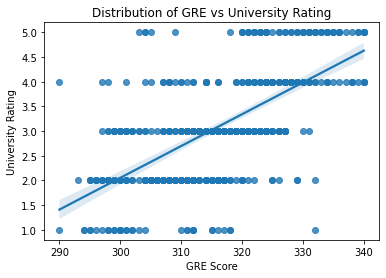

In [10]:
sns.regplot(df['GRE Score'], df['University Rating'])
plt.xlabel('GRE Score')
plt.ylabel('University Rating')
plt.title('Distribution of GRE vs University Rating')
plt.show()

If the university rating is more, it is ideal that University accepts higher GRE Scores

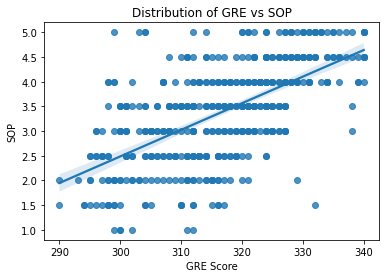

In [11]:
sns.regplot(df['GRE Score'], df['SOP'])
plt.xlabel('GRE Score')
plt.ylabel('SOP')
plt.title('Distribution of GRE vs SOP')
plt.show()

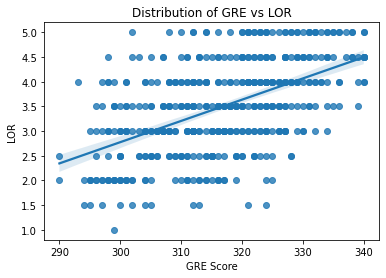

In [12]:
sns.regplot(df['GRE Score'], df['LOR '])
plt.xlabel('GRE Score')
plt.ylabel('LOR')
plt.title('Distribution of GRE vs LOR')
plt.show()

In case of SOP and LOR. It is evident that people students having higher GRE Score having high and low strength of SOP. For example, students having GRE Score between 320 and 330 having SOP strength of 1.5 and also 5. It is same for LOR

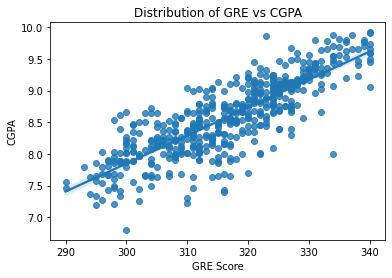

In [13]:
sns.regplot(df['GRE Score'], df['CGPA'])
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('Distribution of GRE vs CGPA')
plt.show()

There may be chances that people with low CGPA can also scored high GRE Scores

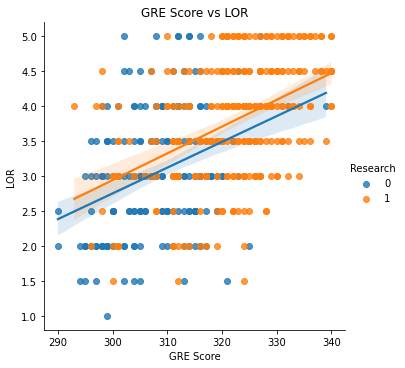

In [14]:
fig = sns.lmplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs LOR")
plt.show()

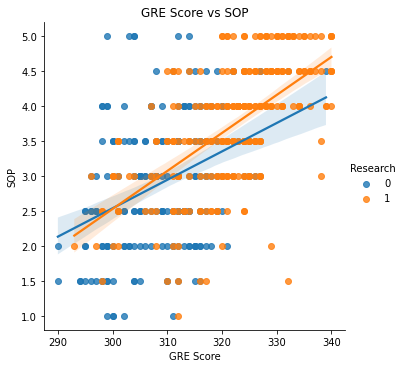

In [15]:
fig = sns.lmplot(x="GRE Score", y="SOP", data=df, hue="Research")
plt.title("GRE Score vs SOP")
plt.show()

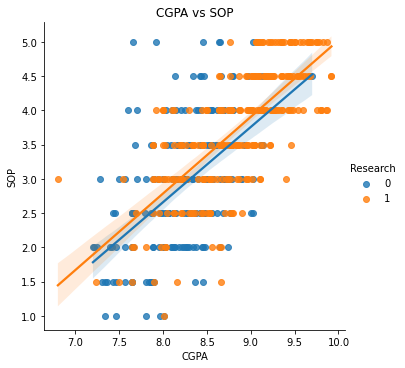

In [16]:
fig = sns.lmplot(x="CGPA", y="SOP", data=df, hue="Research")
plt.title("CGPA vs SOP")
plt.show()

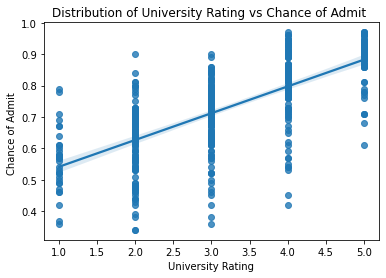

In [17]:
sns.regplot(df['University Rating'], df['Chance of Admit '])
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit ')
plt.title('Distribution of University Rating vs Chance of Admit ')
plt.show()

It is evident that higher the University Rating, greater the chances of Admit. But we can clearly say that, University also gives admit based on other factors such as LOR, CGPA, SOP

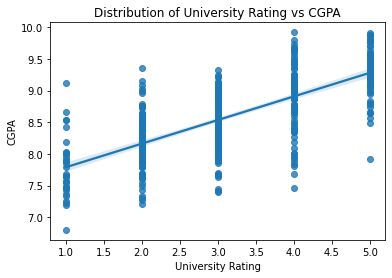

In [18]:
sns.regplot(df['University Rating'], df['CGPA'])
plt.xlabel('University Rating')
plt.ylabel('CGPA')
plt.title('Distribution of University Rating vs CGPA')
plt.show()

Higher Univerity Rating universities have merit students they are having good CGPA

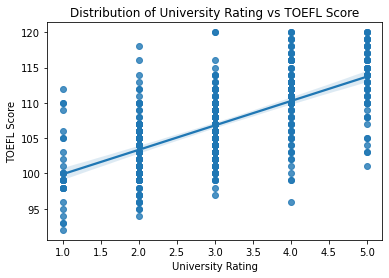

In [19]:
sns.regplot(df['University Rating'], df['TOEFL Score'])
plt.xlabel('University Rating')
plt.ylabel('TOEFL Score')
plt.title('Distribution of University Rating vs TOEFL Score')
plt.show()

There is some positive correaltion. But there are exceptions such as students in lower University ratings also have good scores of GRE and TOFEL  and vice-versa

Upon the previous observation, there are many instances such as student with same GRE and TOFEL Scores may applied to different universities with different ratings

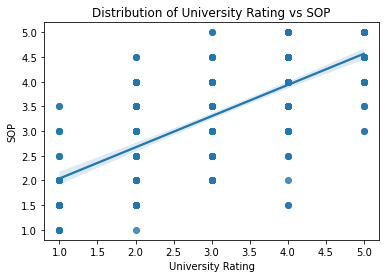

In [20]:
sns.regplot(df['University Rating'], df['SOP'])
plt.xlabel('University Rating')
plt.ylabel('SOP')
plt.title('Distribution of University Rating vs SOP')
plt.show()

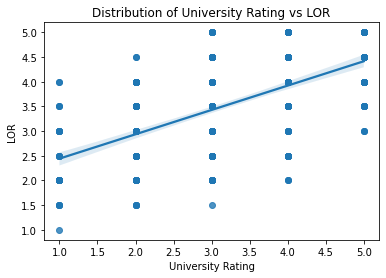

In [21]:
sns.regplot(df['University Rating'], df['LOR '])
plt.xlabel('University Rating')
plt.ylabel('LOR')
plt.title('Distribution of University Rating vs LOR')
plt.show()

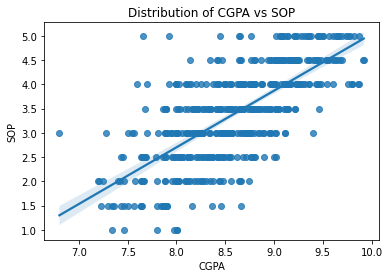

In [22]:
sns.regplot(df['CGPA'], df['SOP'])
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.title('Distribution of CGPA vs SOP')
plt.show()

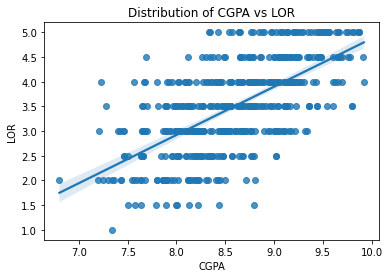

In [23]:
sns.regplot(df['CGPA'], df['LOR '])
plt.xlabel('CGPA')
plt.ylabel('LOR')
plt.title('Distribution of CGPA vs LOR')
plt.show()

We cannot say the students having more CGPA have better SOP and LOR. There are few students who have low CGPA and having good LOR and SOP

# Finding chances to get an admit

Let us try to find what is the minimum profile to get the admission

## GRE 

In [24]:
#Find students having GRE less than 300
df[df['GRE Score']<300].sort_values('Chance of Admit ',ascending=False).head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
204,298,105,3,3.5,4.0,8.54,0,0.69
327,295,101,2,2.5,2.0,7.86,0,0.69
182,299,100,2,3.0,3.5,7.88,0,0.68


In [25]:
#Find students having GRE less than 310
df[df['GRE Score']<310].sort_values('Chance of Admit ',ascending=False).head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
255,307,110,4,4.0,4.5,8.37,0,0.79
195,307,107,2,3.0,3.5,8.52,1,0.78
131,303,105,5,5.0,4.5,8.65,0,0.77
269,308,108,4,4.5,5.0,8.34,0,0.77
256,309,99,3,4.0,4.0,8.56,0,0.76


In [26]:
#Find students having GRE less than 320
df[(df['GRE Score']>310) & (df['GRE Score']<320)].sort_values('Chance of Admit ',ascending=False).head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
73,314,108,4,4.5,4.0,9.04,1,0.84
186,317,107,3,3.5,3.0,8.68,1,0.84
177,319,110,3,3.5,3.5,9.04,0,0.82


By seeing the previous observations, One should have GRE Score greater than 310 then we have higher chances of getting admission. There are few students who have GRE Score less than 310 and getting chances of Admit close to 80% because they have improved in other areas. But at the safe side, one need to score more than 80%. 

## TOFEL

In [27]:
df[df['TOEFL Score']<100].sort_values('Chance of Admit ',ascending=False).head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
50,313,98,3,2.5,4.5,8.30,1,0.76
256,309,99,3,4.0,4.0,8.56,0,0.76
466,314,99,4,3.5,4.5,8.73,1,0.71


In [28]:
df[df['TOEFL Score']<105].sort_values('Chance of Admit ',ascending=False).head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
288,314,104,4,5.0,5.0,9.02,0,0.82
480,321,102,3,3.5,4.0,9.01,1,0.80
449,315,101,3,3.5,4.5,9.13,0,0.79


In [29]:
df[(df['TOEFL Score']>105) & (df['TOEFL Score']<110)].sort_values('Chance of Admit ',ascending=False).head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
260,327,108,5,5.0,3.5,9.13,1,0.87
217,321,109,4,4.0,4.0,9.13,1,0.85


Students who have TOEFL score around 105 have 80% chance of Admit. I think one need to score 105 to get admit

## GRE and TOFEL

In [30]:
df[(df['GRE Score']<310) & (df['TOEFL Score']<105)].sort_values('Chance of Admit ',ascending=False).head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
256,309,99,3,4.0,4.0,8.56,0,0.76
179,307,102,3,3.0,3.0,8.27,0,0.73
483,304,103,5,5.0,3.0,7.92,0,0.71


We can clearly see that students who had GRE scores less than 310 and TOEFL less than 105 has lesser chances of Admit

# University Rating

In [31]:
df.groupby('University Rating').agg({'Chance of Admit ':['mean','min','max']})

Chance of Admit             
                              mean   min   max
University Rating                             
1                         0.562059  0.36  0.79
2                         0.626111  0.34  0.90
3                         0.702901  0.36  0.90
4                         0.801619  0.42  0.97
5                         0.888082  0.61  0.97

We also seen in the plot, so higher the University rating greater the chances of Admit. Still there are some students in higher rating Universities who had less chances of admit

In [32]:
df[(df['University Rating']>=4) & (df['Chance of Admit ']<0.8)].sort_values('Chance of Admit ',ascending=False).tail(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
406,322,103,4,3.0,2.5,8.02,1,0.61
412,314,102,4,2.5,2.0,7.88,1,0.59
122,310,106,4,1.5,2.5,8.36,0,0.57
124,301,106,4,2.5,3.0,8.47,0,0.57
65,325,112,4,3.5,3.5,8.92,0,0.55
465,305,96,4,3.0,4.5,8.26,0,0.54
491,297,99,4,3.0,3.5,7.81,0,0.54
492,298,101,4,2.5,4.5,7.69,1,0.53
117,290,104,4,2.0,2.5,7.46,0,0.45
95,304,100,4,1.5,2.5,7.84,0,0.42


As we see these are the poor profiles, so chances of getting the admit is difficult in these higher universities

## CGPA, GRE, TOFEL

In [33]:
#checking CGPA less than 8 and still getting admit high
df[(df['CGPA']<8)].sort_values('Chance of Admit ',ascending=False).head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
484,317,106,3,3.5,3.0,7.89,1,0.73
483,304,103,5,5.0,3.0,7.92,0,0.71
358,314,105,2,2.5,2.0,7.64,0,0.70


In [34]:
#checking CGPA less than 8 and still getting admit high
df[(df['CGPA']<85)].sort_values('Chance of Admit ',ascending=False).head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
202,340,120,5,4.5,4.5,9.91,1,0.97
143,340,120,4,4.5,4.0,9.92,1,0.97
24,336,119,5,4.0,3.5,9.80,1,0.97


So one student should have minimum of 8.5 CGPA to get admit. But it also depends on other factors such as GRE, TOFEL..etc., There are some students who have high CGPA and having low GRE and TOEFL score and have less chances of admit

In [35]:
df[(df['GRE Score']<310) & (df['TOEFL Score']<105) & ((df['CGPA']<8.5))].sort_values('Chance of Admit ',ascending=False).head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
179,307,102,3,3.0,3.0,8.27,0,0.73
483,304,103,5,5.0,3.0,7.92,0,0.71
180,300,104,3,3.5,3.0,8.16,0,0.71


In [36]:
df[df['CGPA']>8.5].groupby('Chance of Admit ').agg({'GRE Score':['mean','min','max'],'TOEFL Score':['mean','min','max'],'CGPA':['mean','min','max']}).sort_values('Chance of Admit ',ascending=False).head(20)

GRE Score           TOEFL Score                CGPA        \
                        mean  min  max        mean  min  max      mean   min   
Chance of Admit                                                                
0.97              337.500000  334  340  119.750000  119  120  9.875000  9.80   
0.96              337.375000  333  340  116.000000  112  120  9.753750  9.50   
0.95              336.200000  333  340  118.000000  115  120  9.540000  9.06   
0.94              334.230769  328  340  116.692308  112  120  9.533077  9.28   
0.93              330.583333  321  335  115.916667  111  120  9.477500  9.26   
0.92              328.555556  320  337  114.888889  110  118  9.417778  9.19   
0.91              330.500000  322  338  115.000000  112  118  9.328000  9.08   
0.90              330.555556  324  340  116.111111  111  119  9.324444  9.16   
0.89              328.636364  323  339  113.545455  110  119  9.270909  9.07   
0.88              323.000000  320  326  110.750000  110  112  9.152500  9.08   
0.87              325.625000  320  332  111.125000  108  117  9.101250  8.97   
0.86              325.400000  320  331  114.400000  110  120  9.124000  8.94   
0.85              322.000000  320  325  111.500000  109  114  9.041667  8.64   
0.84              323.909091  314  329  109.636364  107  113  9.032727  8.68   
0.83              326.500000  325  328  112.750000  111  114  9.032500  8.77   
0.82              320.888889  314  328  109.555556  104  112  8.986667  8.77   
0.81              323.125000  312  329  110.125000  106  116  8.860000  8.64   
0.80              322.846154  312  327  110.615385  102  116  8.894615  8.66   
0.79              323.428571  313  332  109.571429  101  115  8.880714  8.54   
0.78              320.250000  307  328  108.000000  100  115  8.895000  8.52   

                        
                   max  
Chance of Admit         
0.97              9.92  
0.96              9.87  
0.95              9.70  
0.94              9.80  
0.93              9.68  
0.92              9.86  
0.91              9.46  
0.90              9.60  
0.89              9.70  
0.88              9.23  
0.87              9.27  
0.86              9.30  
0.85              9.32  
0.84              9.18  
0.83              9.14  
0.82              9.15  
0.81              9.14  
0.80              9.11  
0.79              9.14  
0.78              9.16

From this, we can clearly say that if you have GRE>320 and TOEFL>110 and CGPA>8.5 you definitely have a admit. It also basically tells that student have great profile and good strength of LOR and SOP. Le us confirm that.

# LOR and SOP

In [37]:
df[(df['GRE Score']>310) & (df['TOEFL Score']>105) & ((df['CGPA']>8.5))].sort_values('Chance of Admit ',ascending=False).head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
203,334,120,5,4.0,5.0,9.87,1,0.97
202,340,120,5,4.5,4.5,9.91,1,0.97
24,336,119,5,4.0,3.5,9.80,1,0.97
143,340,120,4,4.5,4.0,9.92,1,0.97
71,336,112,5,5.0,5.0,9.76,1,0.96
384,340,113,4,5.0,5.0,9.74,1,0.96
130,339,114,5,4.0,4.5,9.76,1,0.96
496,337,117,5,5.0,5.0,9.87,1,0.96
213,333,119,5,5.0,4.5,9.78,1,0.96
385,335,117,5,5.0,5.0,9.82,1,0.96


In [38]:
df[(df['GRE Score']>310) & (df['TOEFL Score']>105) & ((df['CGPA']>8.5))]\
.groupby('Chance of Admit ').agg({'SOP':['mean','min','max'],'LOR ':['mean','min','max']}).sort_values('Chance of Admit ',ascending=False).head(10)

SOP                LOR           
                      mean  min  max      mean  min  max
Chance of Admit                                         
0.97              4.250000  4.0  4.5  4.250000  3.5  5.0
0.96              4.750000  4.0  5.0  4.687500  3.5  5.0
0.95              4.900000  4.5  5.0  4.400000  4.0  5.0
0.94              4.692308  4.0  5.0  4.846154  4.5  5.0
0.93              4.583333  4.0  5.0  4.250000  3.5  5.0
0.92              4.388889  4.0  5.0  4.500000  3.5  5.0
0.91              4.250000  3.0  5.0  4.450000  3.5  5.0
0.90              4.500000  4.0  5.0  4.111111  3.0  4.5
0.89              4.318182  3.5  5.0  4.136364  3.0  4.5
0.88              4.875000  4.5  5.0  4.500000  4.0  5.0

We definitely assume that students who has higher CGPA will have good profiles of SOP and LOR. But there are many students who have higher chances of Admit and having average SOP and LOR. Our above assumption is wrong and this depicts that they have lesser correaltion

In [39]:
df[(df['Chance of Admit ']>=0.90) & (df['SOP']<=4) & (df['LOR ']<=4)]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
24,336,119,5,4.0,3.5,9.80,1,0.97
33,340,114,5,4.0,4.0,9.60,1,0.90
142,331,115,5,4.0,3.5,9.44,1,0.92
148,339,116,4,4.0,3.5,9.80,1,0.96
150,334,114,4,4.0,4.0,9.43,1,0.93
285,331,116,5,4.0,4.0,9.26,1,0.93
361,334,116,4,4.0,3.5,9.54,1,0.93
403,330,116,4,4.0,3.5,9.23,1,0.91


# Research

Will Research add anything to the profile?

In [40]:
df.groupby('Research')\
.agg({'GRE Score':['mean','min','max'],'TOEFL Score':['mean','min','max'],'CGPA':['mean','min','max'],'Chance of Admit ':['mean','min','max']})\


GRE Score           TOEFL Score               CGPA             \
                mean  min  max        mean min  max      mean  min   max   
Research                                                                   
0         309.300000  290  339  103.990909  92  120  8.234727  7.2  9.70   
1         322.107143  293  340  109.707143  95  120  8.844929  6.8  9.92   

         Chance of Admit               
                     mean   min   max  
Research                               
0                0.634909  0.34  0.89  
1                0.789964  0.36  0.97

Even after doing Reserach, we have mean of admit around 79% which tells us that there are students who done research but has low admit chance

In [41]:
df[df['Chance of Admit ']>0.80].groupby('Research').count()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
Research,,,,,,,
0,9,9,9,9,9,9,9
1,133,133,133,133,133,133,133


Doing Research is great addition to profile.

In [42]:
df.corr()['Research']

GRE Score            0.563398
TOEFL Score          0.467012
University Rating    0.427047
SOP                  0.408116
LOR                  0.372526
CGPA                 0.501311
Research             1.000000
Chance of Admit      0.545871
Name: Research, dtype: float64

Reserach doesnot provide any high correlation with any other factor. So research is not mandatory but adds strength to profile as people having admit chance >80% having higher proportion of research

**If any have any ideas or suggestions, please comment. It would be helpful.**